# Caso 2
El equipo comercial quiere diseñar una nueva estrategia de atracción para cerrar clientes de una segunda
tarjeta de crédito. Teniendo en cuenta que el comportamiento del cliente es importante a la hora
de entender el posible cierre de un negocio ustedes deciden diseñar un modelo de datos que
permita establecer estos diferenciales para la estrategia.
En general el equipo de mercadeo cree que la mejor manera de repartir a los clientes es en 4 grupos.
Determine si esta opinión es razonable a la luz del modelamiento y de las métricas de desempeño.


In [2]:
#Librerias
##Tratamineto estructurado de datos
import pandas as pd
import numpy as np

##Graficos
import matplotlib.pyplot as plt
import seaborn as sb

##Advertencias
import warnings
warnings.filterwarnings('ignore')

In [4]:
import os

# Ruta del script actual
print("Ruta actual:", os.getcwd())

# Verifica si el archivo existe en esa ruta
archivo = "datos_caso_2.csv"
if os.path.isfile(archivo):
    print(f"✅ El archivo '{archivo}' está en la misma carpeta.")
else:
    print(f"❌ El archivo '{archivo}' NO está en la misma carpeta.")


Ruta actual: c:\Users\Laura Gonzalez\Desktop\Computación Científica
✅ El archivo 'datos_caso_2.csv' está en la misma carpeta.


In [7]:
data = pd.read_csv('datos_caso_2.csv')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

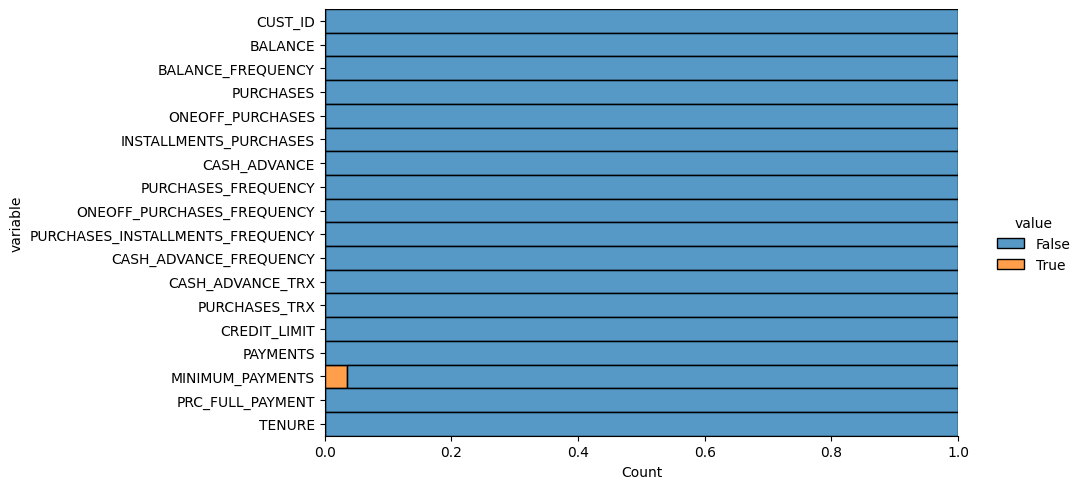

In [9]:
#Visualizar la proporcion de datos nulos por variable
data.isnull().melt().pipe(lambda df: sb.displot(data=df, y= 'variable',hue= 'value', multiple= 'fill',aspect=2))

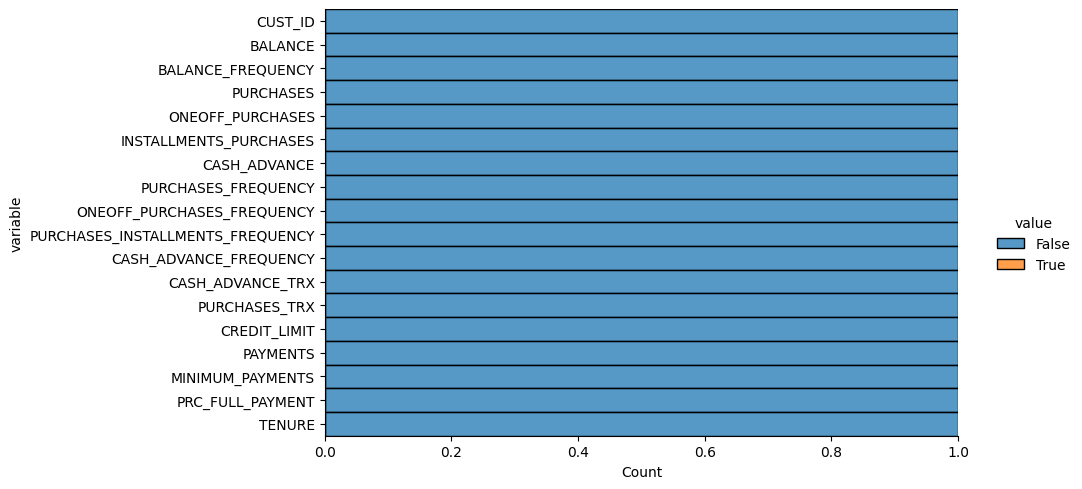

In [10]:
# Eliminar registros nulos
data_limpio = data.dropna(subset=['MINIMUM_PAYMENTS'])
data_limpio.isnull().melt().pipe(lambda df: sb.displot(data=df, y= 'variable',hue= 'value', multiple= 'fill',aspect=2))

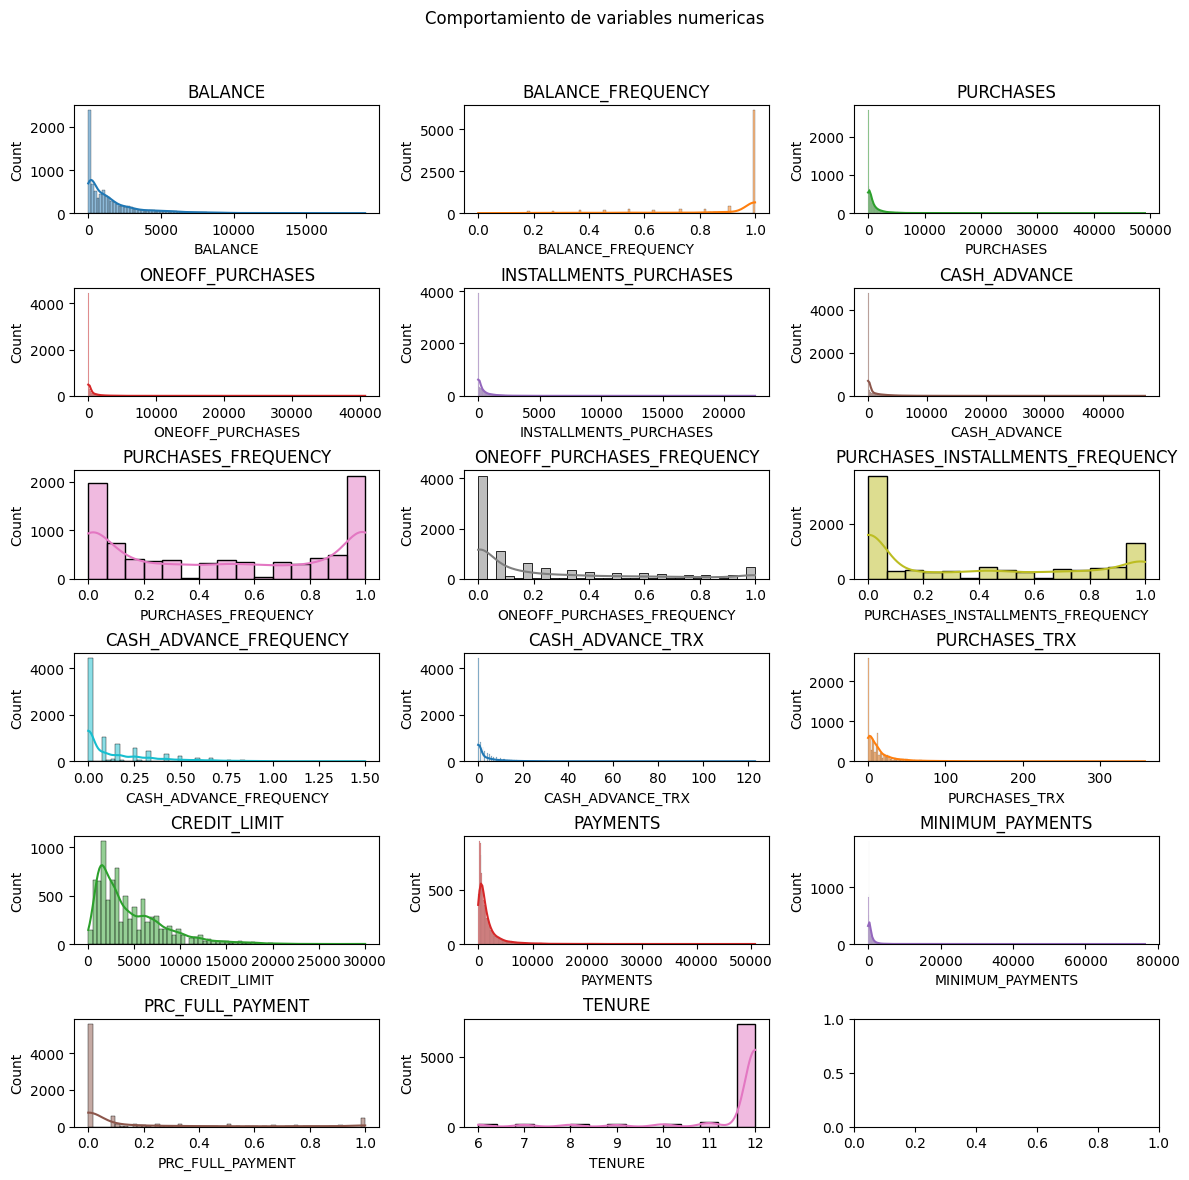

In [11]:
#Exploracion univariada de los datos
##Para datos numericos:histogramas de frecuencia

fig, ax = plt.subplots(6,3, figsize = (12,12))
ax = ax.flat
num_col = data.select_dtypes(include= ['int64', 'float64']).columns
for i, col in enumerate(num_col):
    sb.histplot(data= data_limpio, x= col, kde= True, color= (list(plt.rcParams['axes.prop_cycle'])*7)[i]['color'], ax = ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top= 0.9)
fig.suptitle('Comportamiento de variables numericas')
plt.show()

# Exploracion univariada

<function matplotlib.pyplot.show(close=None, block=None)>

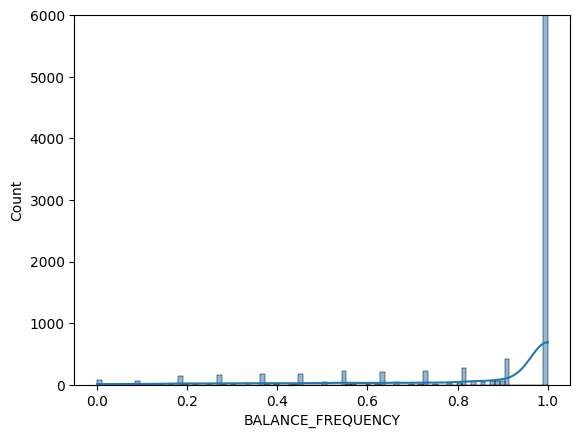

In [12]:
sb.histplot(data= data, x= data['BALANCE_FREQUENCY'], kde= True)
plt.ylim(0, 6000)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

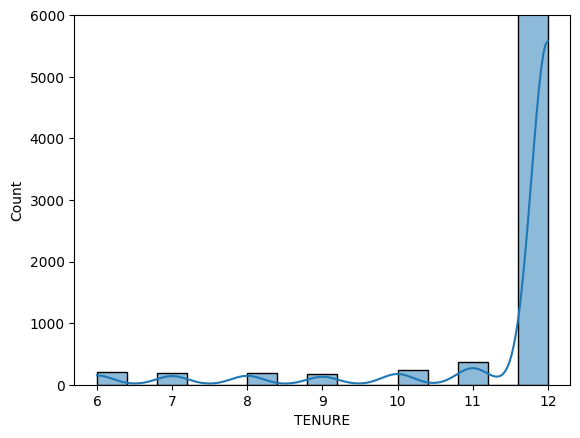

In [13]:
sb.histplot(data= data, x= data['TENURE'], kde= True)
plt.ylim(0, 6000)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

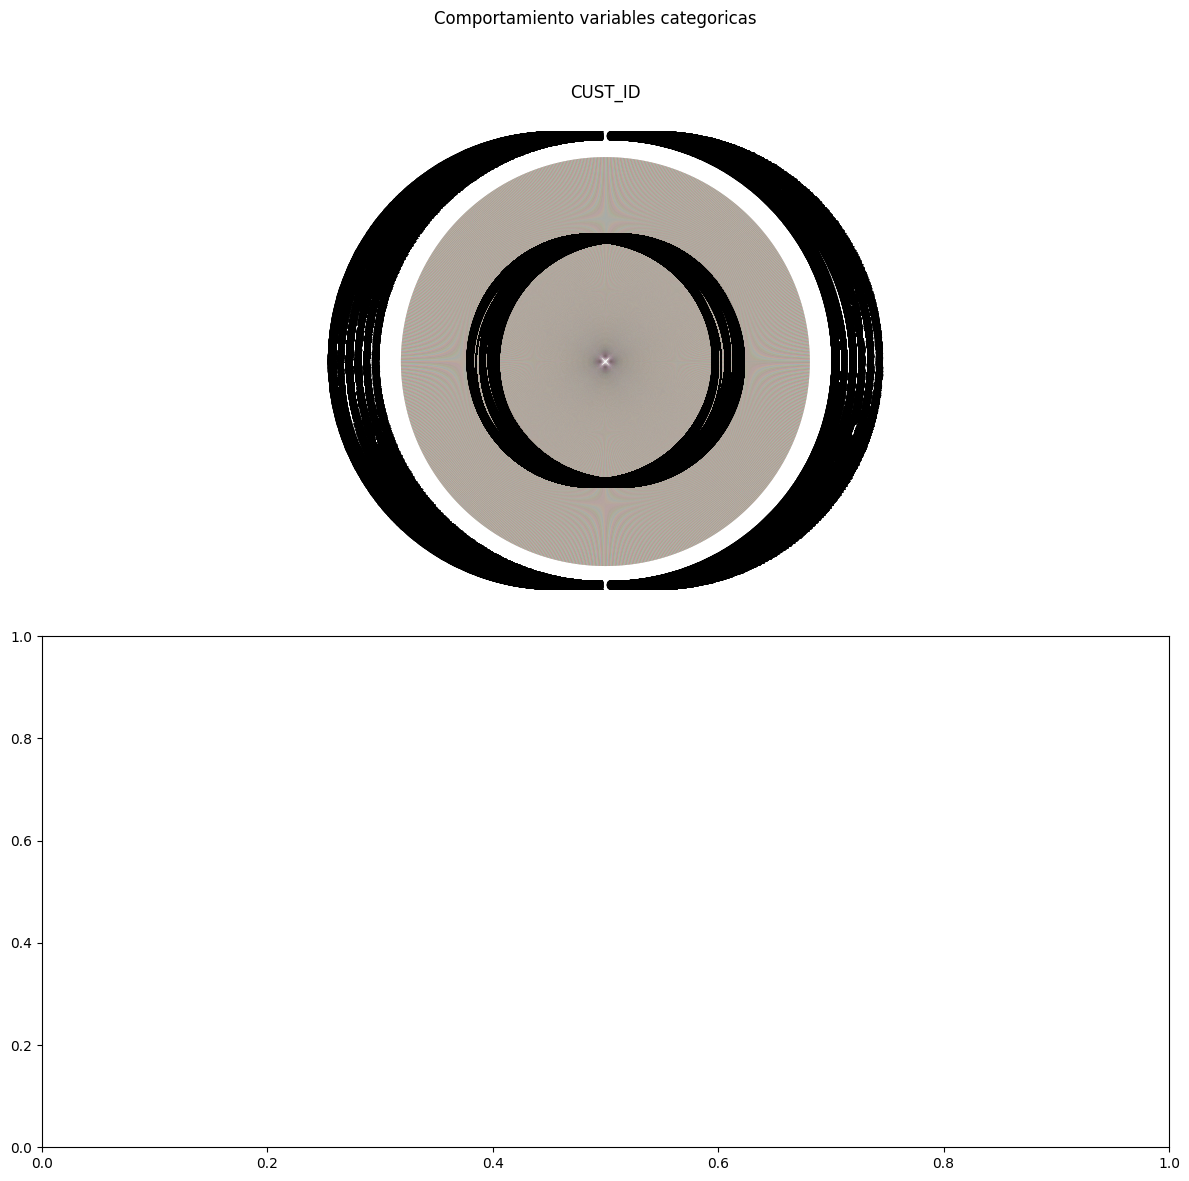

In [14]:
fig, ax = plt.subplots(2, 1, figsize= (12,12))
ax = ax.flat
cat_col = data.select_dtypes(include= ['object']).columns
for i, col in enumerate(cat_col):
    ax[i].pie(x= data[col].value_counts(), labels= data[col].value_counts().index, autopct='%0.1f%%')
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle("Comportamiento variables categoricas")
plt.show


# Exploracion multivariada

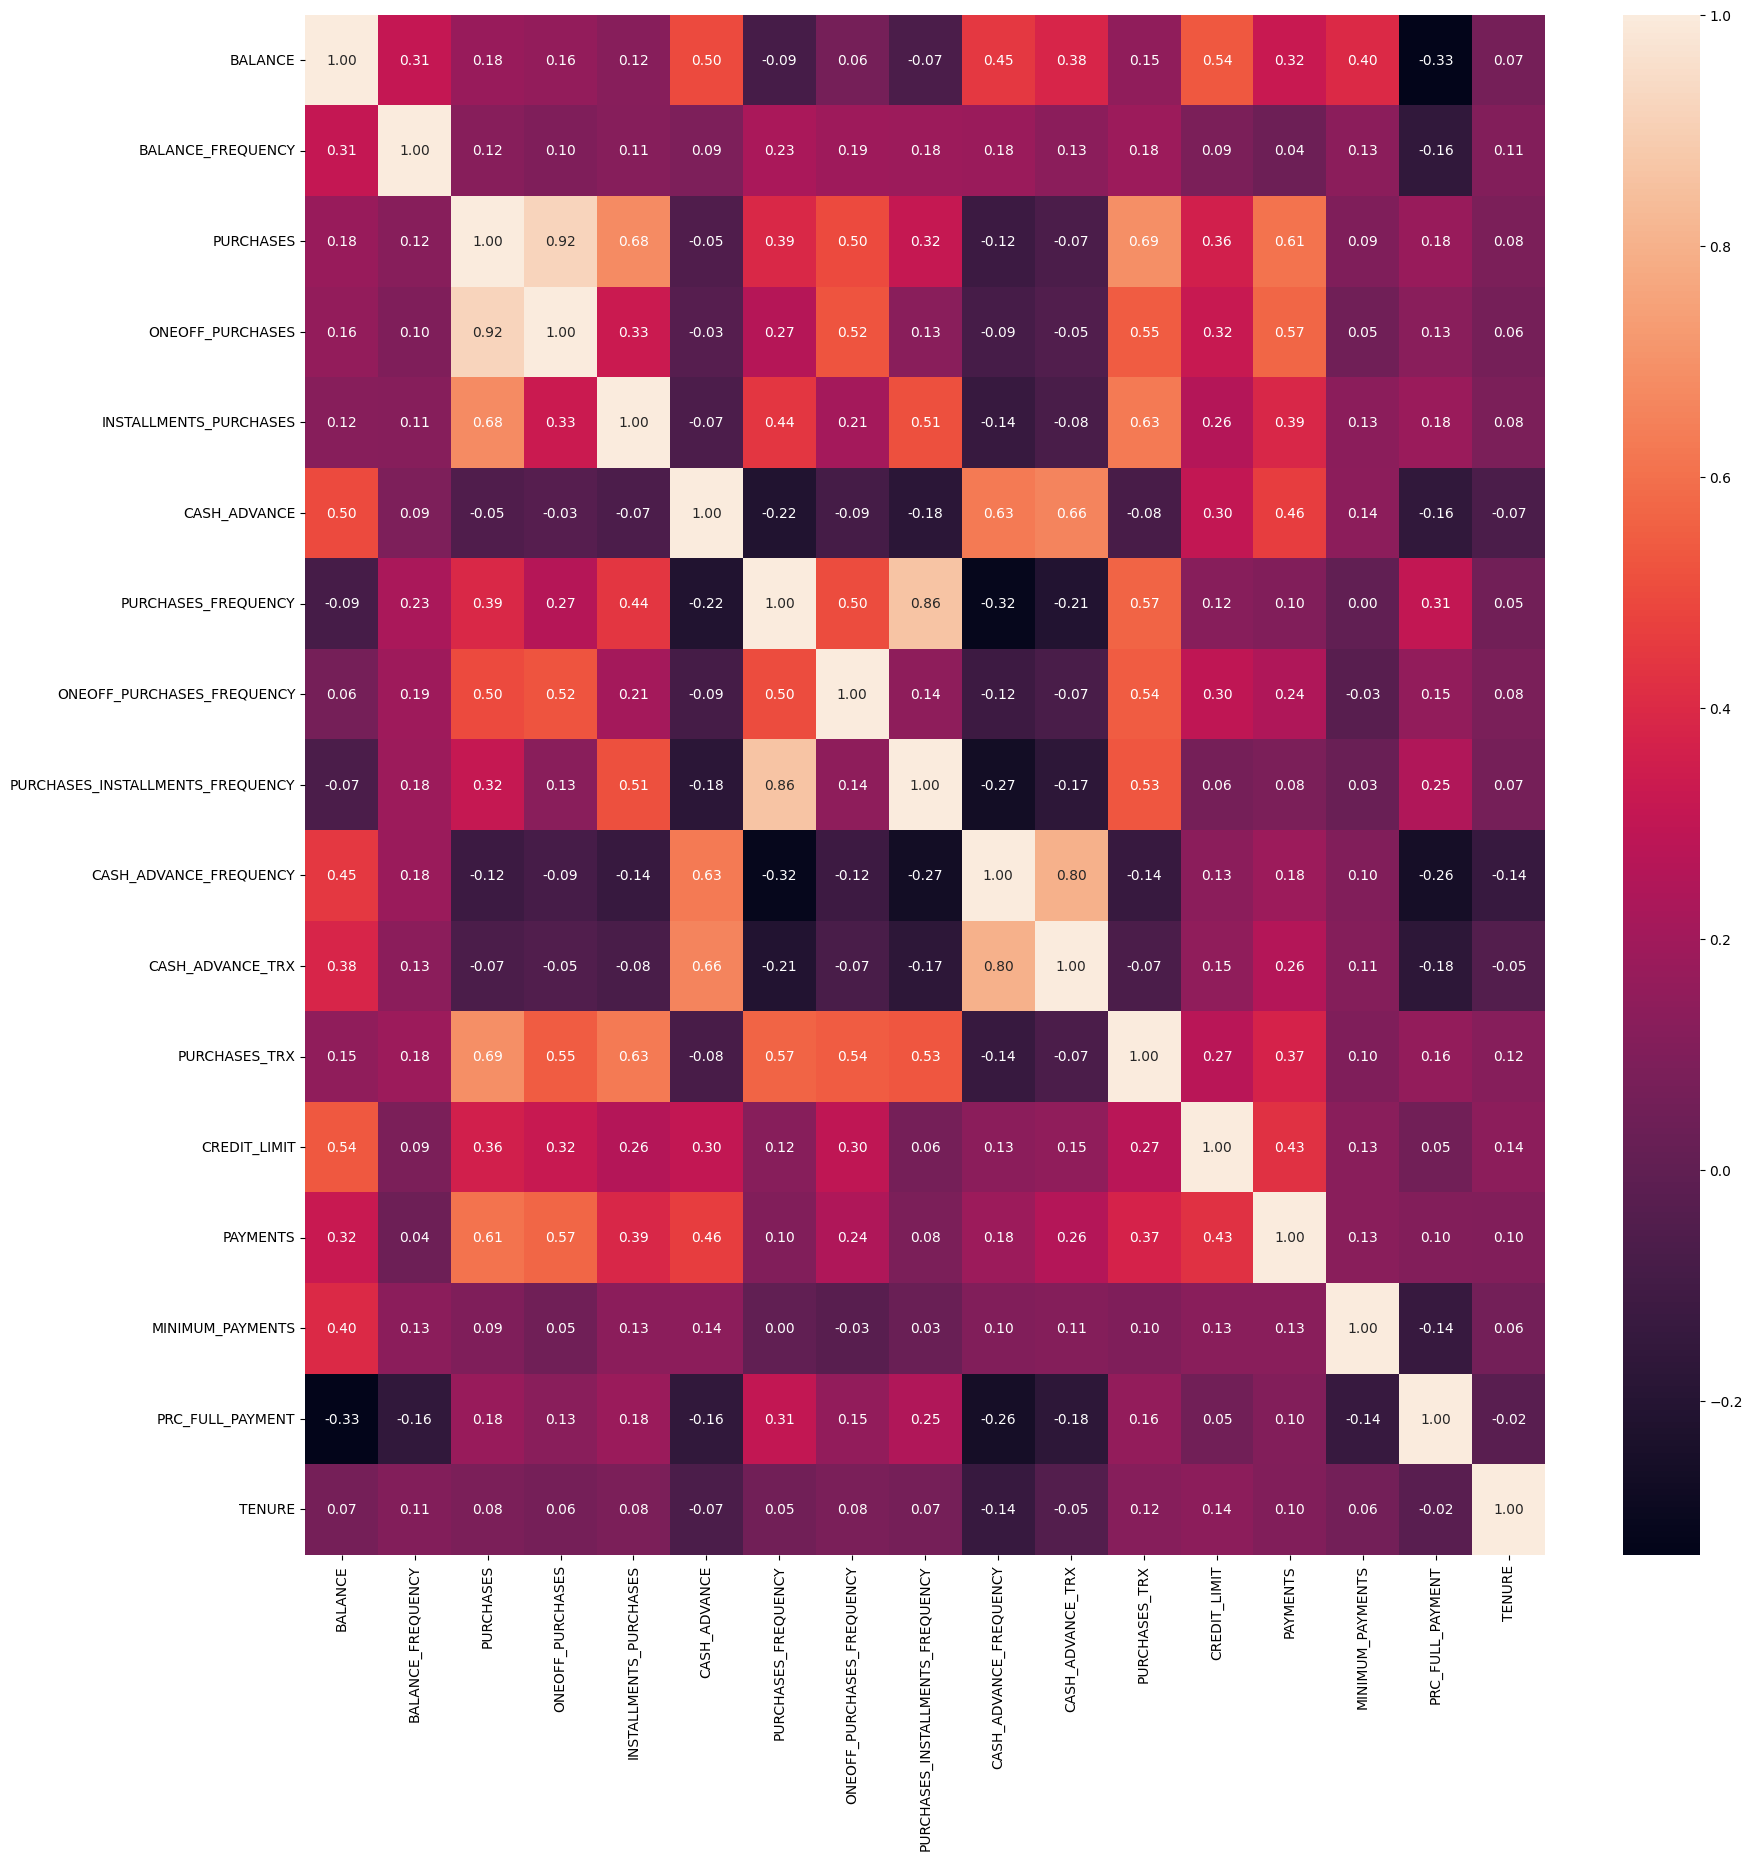

In [15]:
#Grafico para analisis multivariado
plt.figure(figsize= (20,20))
sb.heatmap(data= data_limpio.corr(numeric_only= True),annot= True, fmt= '.2f')
plt.show()

 6. Preparación de los datos

 - Activar las desicones para ignorar variables
 - Transformación de variables para que sean entendibles por el modelo

- PURCHASES - ONEOFF_PURCHASES (0.92) (PURCHASES)
- PURCHASES_FREQUENCY - PURCHASES_INSTALLMENTS_FREQUENCY (0.86) (PURCHASES_FREQUENCY)
- CASH_ADVANCE_FREQUENCY - CASH_ADVANCE_TRX (0.8) (CASH_ADVANCE_FREQUENCY)

In [17]:
data_mod= data.drop (["PURCHASES", "ONEOFF_PURCHASES"],axis=1)
data_mod.info()
#El dato crudo no se toca , por eso creo un nuevo df llamado data mod

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   INSTALLMENTS_PURCHASES            8950 non-null   float64
 4   CASH_ADVANCE                      8950 non-null   float64
 5   PURCHASES_FREQUENCY               8950 non-null   float64
 6   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 7   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 8   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 9   CASH_ADVANCE_TRX                  8950 non-null   int64  
 10  PURCHASES_TRX                     8950 non-null   int64  
 11  CREDIT_LIMIT                      8949 non-null   float64
 12  PAYMEN

In [ ]:
#Transformación de variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

#identificar las columnas según tipo
num_col=data_mod.select_dtypes(include=["int64","float64"]).columns.to_list()
cat_col=data_mod.select_dtypes(include=["object"]).columns.to_list()

#Definir el tipo de transformación por tipo de dato
num_transformer=Pipeline(steps=[("scaler", MinMaxScaler())]) #escala los resultados entre 0 y 1
cat_transformer=Pipeline(steps=[("encoder", OneHotEncoder())]) #transformacion para variable catgorica, la convierte en 0 o en 1

#Diseño del transformador de columnas
preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_col), ("cat", cat_transformer, cat_col)], remainder= "passthrough")
preprocessor

: 

In [ ]:
data_pre= preprocessor.fit_transform(data_mod)
data_pre
#genera una lista de listas, donde tenemos un valor entre 0 y 1 para todas las columnas, convertirlo en df para visualizarlo mejor

In [ ]:
code_cat= preprocessor.named_transformers_["cat"]["encoder"].get_feature_names_out(cat_col)
labels=np.concatenate([num_col, code_cat])
data_pro=pd.DataFrame(data_pre, columns =labels)
data_pro.head()
#etsán listos los datos para hacer los modelos de agrupamiento

In [ ]:
#7. Construcción del modelo
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#buscar el valo rde k
range_k= range(2,25)
inertia =[]

for n_clusters in range_k:
  kmeans_model = KMeans(n_clusters = n_clusters,
                        n_init= 20, random_state=123)
  kmeans_model.fit(data_pro)
  inertia.append(kmeans_model.inertia_)

plt.figure(figsize=(8,8))
plt.plot(range_k, inertia, marker ='o')
plt.xlabel('n. grupos')
plt.ylabel('Inertia')
plt.title('Grafico')
plt.show()

In [ ]:
#busqueda fina de k
#dio malo, mirar que pasa
range_k=range(6,11)
sil_score = [] # Initialize the list here
for n_clusters in range_k:
  kmeans_model = KMeans(n_clusters = n_clusters,
                        n_init= 20, random_state=123)
  kmeans_model.fit(data_pro)
  cluster_label = kmeans_model.fit_predict(data_pro)
  sil_avg= silhouette_score(data_pro, cluster_label)
  sil_score.append(sil_avg)


plt.figure(figsize=(8,8))
plt.plot(range_k, sil_score, marker ='o')
plt.xlabel('n. grupos')
plt.ylabel('Indice de silhouette')
plt.title('Grafico de silhouette')
plt.show()